# **EDA** 
## APLICACION EN MUESTRAS DE DIABETES PROVENIENTES DE UN ESTUDIO METABOLÓMICO

Titulo dataset: Human Serum Metabolome Variability 

SET DE DATOS SACADOS DE : https://www.kaggle.com/datasets/desertman/human-serum-metabolome-variability

Autor: Claudia Balderas 
Github: https://github.com/MetaboClaud

# 1. Importar librerias

* Data analysis: Numpy, Pandas
* Visualización: matplotlib, matplotlib.pyplot, seaborn, plotly, cimcb_lite

In [1]:
##Data analysis
import numpy as np
import pandas as pd



##Visualización

#matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#seaborn
import seaborn as sns


# plotly
from plotly.offline import init_notebook_mode, iplot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px


#librería para hacer el PCA y el análisis estadístico. 
#Libreria correspondiente al repositorio The Centre for Integrative Metabolomics and Computational Biology
# https://github.com/orgs/CIMCB/repositories

import cimcb_lite as cb  




# 2. Cargar datos


### 2.1 Dataset Hoja 1 ---> Informacion general de estudio

In [2]:
#Dataset información general del estudio
sample_metadata = pd.read_excel("../data/study_data.xlsx",sheet_name= "sample_metadata" )
sample_metadata.head()

,sample_id,sample_id_study,CLIENT_IDENTIFIER,CLIENT_MATRIX,DAY,Health,Time,HEALTH_STATUS,RUN_DAY,SAMPLE_AMT,SUBJECT,Time Point,study_group,sex,BMI,hba1c
0,sample_0001,2904988,101-d2-MMT(-0.5h)-S002,Serum,D2,Healthy,Pre,healthy subjects,1,200 ul,101,pre,Healthy_D2_Pre,f,27.9,5.05
1,sample_0002,2904989,101-d2-MMT(+1h)-S032,Serum,D2,Healthy,Post,healthy subjects,1,200 ul,101,1h,Healthy_D2_Post,f,27.9,5.05
2,sample_0003,2904991,101-d14-MMT(-0.5h)-S002,Serum,D14,Healthy,Pre,healthy subjects,1,200 ul,101,pre,Healthy_D14_Pre,f,27.9,5.05
3,sample_0004,2904992,101-d14-MMT(+1h)-S032,Serum,D14,Healthy,Post,healthy subjects,1,200 ul,101,1h,Healthy_D14_Post,f,27.9,5.05
4,sample_0005,2904994,101-d28-MMT(-0.5h)-S002,Serum,D28,Healthy,Pre,healthy subjects,1,200 ul,101,pre,Healthy_D28_Pre,f,27.9,5.05


In [3]:
#Nombre de las columnas
sample_metadata.columns

Index(['sample_id', 'sample_id_study', 'CLIENT_IDENTIFIER', 'CLIENT_MATRIX',
       'DAY', 'Health', 'Time', 'HEALTH_STATUS', 'RUN_DAY', 'SAMPLE_AMT',
       'SUBJECT', 'Time Point', 'study_group', 'sex', 'BMI', 'hba1c'],
      dtype='object')

***Features que nos interesan para el análisis***

    *sample_id: ID único de muestra
    *CLIENT_MATRIX: Tipo de muestra extraída:
    *Health: Nombre corto correspondiente al estado de salud
    *HEALTH_STATUS: Estado de salud 
    *sex: sexo del paciente
    *BMI: Indice de masa corporal
    *hba1: Hemoglobina glicosilada 

In [4]:
#información básica del dataset, tipos de datos y columnas
sample_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sample_id          180 non-null    object 
 1   sample_id_study    180 non-null    int64  
 2   CLIENT_IDENTIFIER  180 non-null    object 
 3   CLIENT_MATRIX      180 non-null    object 
 4   DAY                180 non-null    object 
 5   Health             180 non-null    object 
 6   Time               180 non-null    object 
 7   HEALTH_STATUS      180 non-null    object 
 8   RUN_DAY            180 non-null    int64  
 9   SAMPLE_AMT         180 non-null    object 
 10  SUBJECT            180 non-null    int64  
 11  Time Point         180 non-null    object 
 12  study_group        180 non-null    object 
 13  sex                180 non-null    object 
 14  BMI                180 non-null    float64
 15  hba1c              180 non-null    float64
dtypes: float64(2), int64(3), o

### 2.2 Dataset Hoja2 --> Principal de metabolitos encontrados

In [5]:
#Dataset principal de metabolitos encontrados 
data_matrix = pd.read_excel("../data/study_data.xlsx",sheet_name= "data_matrix")
data_matrix.head()

,compound_id,sample_0001,sample_0002,sample_0003,sample_0004,sample_0005,sample_0006,sample_0007,sample_0008,sample_0009,...,sample_0171,sample_0172,sample_0173,sample_0174,sample_0175,sample_0176,sample_0177,sample_0178,sample_0179,sample_0180
0,compound_0001,0.793620,0.713684,1.073165,1.074977,0.903153,0.792167,1.195207,1.141416,1.274139,...,1.048767,1.094411,1.086644,1.254065,0.745389,0.542919,0.628734,0.555390,0.590216,0.601484
1,compound_0002,0.743363,0.762673,1.184788,0.959059,0.442795,0.685413,1.683612,1.412755,1.128855,...,1.191599,1.161694,0.903035,0.842545,0.561035,0.553931,0.701192,0.576311,0.830575,0.649295
2,compound_0003,0.360069,0.716626,0.448938,0.695333,0.444998,0.935179,1.444924,1.947233,1.182661,...,0.673173,1.030949,0.888554,1.156123,1.901547,2.349338,1.245951,2.362415,1.660026,2.050633
3,compound_0004,0.557168,0.739390,0.609914,0.699223,0.668752,0.899727,1.476924,1.460609,1.116283,...,0.882301,1.007380,0.817482,0.868670,1.164877,0.936585,1.079366,1.029833,0.937246,1.468545
4,compound_0005,0.886952,0.921852,0.861769,0.893694,0.917792,0.979249,1.648081,1.751745,1.266781,...,1.278643,1.313778,1.210348,1.292895,1.224971,0.965326,1.014223,0.869503,1.008572,1.196692


In [6]:
data_matrix.tail()

,compound_id,sample_0001,sample_0002,sample_0003,sample_0004,sample_0005,sample_0006,sample_0007,sample_0008,sample_0009,...,sample_0171,sample_0172,sample_0173,sample_0174,sample_0175,sample_0176,sample_0177,sample_0178,sample_0179,sample_0180
1481,compound_1482,0.690831,0.917702,0.736977,0.750908,0.506770,0.655764,1.532433,1.592221,1.506956,...,1.494171,1.356426,1.364765,1.270024,1.068146,0.908436,0.842580,0.822898,1.028227,0.941312
1482,compound_1483,0.865679,0.371899,0.919946,0.392298,0.651075,0.631727,1.454727,0.783603,1.684733,...,1.542909,0.911678,1.014928,0.916838,1.313251,0.788290,1.243000,0.200175,0.774527,1.234610
1483,compound_1484,0.254363,0.244953,0.209242,0.211141,0.679437,0.776275,0.016702,0.175735,0.703014,...,2.026509,1.929681,2.957102,2.175087,1.603923,0.977343,0.815561,0.596484,3.107715,3.388902
1484,compound_1485,1.369263,1.417962,1.028140,1.126669,0.936695,0.941886,1.353740,1.180336,1.073465,...,0.817718,0.841181,1.009938,1.036077,0.969826,1.131925,1.041996,1.050490,0.967872,0.958265
1485,compound_1486,0.898327,1.023614,1.718457,2.942013,0.993321,1.099359,1.151924,1.073034,1.118541,...,0.908398,1.006679,0.911629,1.204362,0.869234,0.896456,0.743896,0.731513,0.618127,0.744399


In [7]:
#información básica del dataset, tipos de datos y columnas
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Columns: 181 entries, compound_id to sample_0180
dtypes: float64(180), object(1)
memory usage: 2.1+ MB


***Features***

    -compound_id: 
    -Sample_n:

In [8]:
# Información del tamaño del dataset
print("El dataset tiene {0} Filas".format(data_matrix.shape[0]))
print("El dataset tiene {0} Columnas".format(data_matrix.shape[1]))

El dataset tiene 1486 Filas
El dataset tiene 181 Columnas


In [9]:
#Revisar valores nulos
data_matrix.isna()

,compound_id,sample_0001,sample_0002,sample_0003,sample_0004,sample_0005,sample_0006,sample_0007,sample_0008,sample_0009,...,sample_0171,sample_0172,sample_0173,sample_0174,sample_0175,sample_0176,sample_0177,sample_0178,sample_0179,sample_0180
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1482,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1483,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1484,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
np.sum(data_matrix.isna())

compound_id    0
sample_0001    0
sample_0002    0
sample_0003    0
sample_0004    0
              ..
sample_0176    0
sample_0177    0
sample_0178    0
sample_0179    0
sample_0180    0
Length: 181, dtype: int64

### 2.3 Dataset Hoja 3   -----> Información identificacion/clase de los compuestos

In [11]:
#Dataset información identificación/clase de los compuestos 
data_dictionary = pd.read_excel("../data/study_data.xlsx",sheet_name= "data_dictionary" )
data_dictionary.head()

,compound_id,PATHWAY_SORTORDER,BIOCHEMICAL,SUPER_PATHWAY,SUB_PATHWAY,COMP_ID,PLATFORM,RI,MASS,PUBCHEM,KEGG,HMDB_ID
0,compound_0001,1,glycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",58,LC/MS Pos Early,1375,76.0393,750,C00037,HMDB00123
1,compound_0002,2,N-acetylglycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",27710,LC/MS Neg,731,116.0353,10972,NaN,HMDB00532
2,compound_0003,4,sarcosine,Amino Acid,"Glycine, Serine and Threonine Metabolism",1516,LC/MS Pos Early,1280,90.055,1088,C00213,HMDB00271
3,compound_0004,5,dimethylglycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",5086,LC/MS Pos Early,1104,104.0706,673,C01026,HMDB00092
4,compound_0005,6,betaine,Amino Acid,"Glycine, Serine and Threonine Metabolism",3141,LC/MS Pos Early,1064,118.0863,247,C00719,HMDB00043


In [12]:
data_dictionary.tail()

,compound_id,PATHWAY_SORTORDER,BIOCHEMICAL,SUPER_PATHWAY,SUB_PATHWAY,COMP_ID,PLATFORM,RI,MASS,PUBCHEM,KEGG,HMDB_ID
1481,compound_1482,.,X - 24699,.,.,53127,LC/MS Pos Early,2402.3,241.1544,NaN,NaN,NaN
1482,compound_1483,.,X - 24728,.,.,53157,LC/MS Pos Early,1431,238.0376,NaN,NaN,NaN
1483,compound_1484,.,X - 24738,.,.,53214,LC/MS Pos Early,1051,160.0967,NaN,NaN,NaN
1484,compound_1485,.,X - 24748,.,.,53267,LC/MS Neg,4596,321.1469,NaN,NaN,NaN
1485,compound_1486,.,X - 24766,.,.,54704,LC/MS Pos Early,2068.7,115.0866,NaN,NaN,NaN


In [13]:
data_dictionary.columns

Index(['compound_id', 'PATHWAY_SORTORDER', 'BIOCHEMICAL', 'SUPER_PATHWAY',
       'SUB_PATHWAY', 'COMP_ID', 'PLATFORM', 'RI', 'MASS', 'PUBCHEM', 'KEGG',
       'HMDB_ID'],
      dtype='object')

In [14]:
#información básica del dataset, tipos de datos y columnas
data_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   compound_id        1486 non-null   object
 1   PATHWAY_SORTORDER  1486 non-null   object
 2   BIOCHEMICAL        1486 non-null   object
 3   SUPER_PATHWAY      1486 non-null   object
 4   SUB_PATHWAY        1486 non-null   object
 5   COMP_ID            1486 non-null   int64 
 6   PLATFORM           1486 non-null   object
 7   RI                 1486 non-null   object
 8   MASS               1486 non-null   object
 9   PUBCHEM            403 non-null    object
 10  KEGG               268 non-null    object
 11  HMDB_ID            358 non-null    object
dtypes: int64(1), object(11)
memory usage: 139.4+ KB


# 3. Obtención de gráficos

### 3.1 Dataset Hoja 1 ---> Informacion general de estudio

In [15]:
# Grupos de estudio

Grupos_de_estudio= sample_metadata['HEALTH_STATUS'].value_counts()
Grupos_de_estudio

healthy subjects     60
prediabetic          60
diabetic subjects    60
Name: HEALTH_STATUS, dtype: int64

In [16]:
#Pasar los datos a formato lista para después hacer el gráfico 
Diagnostico= sample_metadata['HEALTH_STATUS'].unique().tolist()
Diagnostico

['healthy subjects', 'prediabetic', 'diabetic subjects']

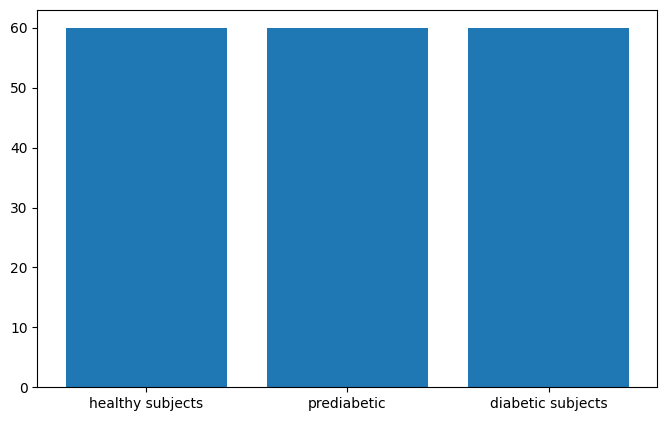

In [17]:
##Gráfico para representar el número de participantes en el estudio 
plt.figure(figsize=(8,5), dpi=100)
plt.bar(Diagnostico, Grupos_de_estudio)
plt.show()

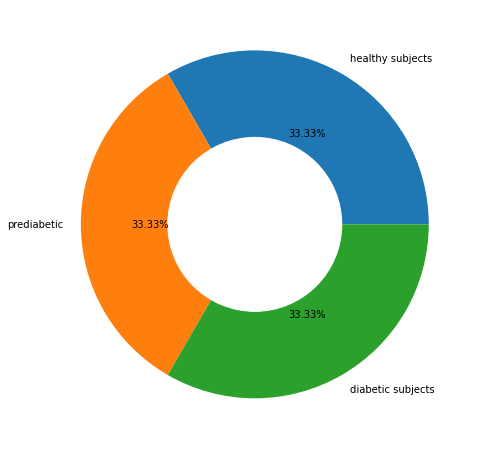

In [18]:
#Gráfico para representar el número de participantes en el estudio  (Final para presentación)
muestras_de_estudio = sample_metadata['HEALTH_STATUS'].value_counts()
 
# Crear circulo de dentro
my_circle=plt.Circle( (0,0), 0.5, color='white')   
#crear el pai
plt.figure(figsize=(8,8))
plt.pie(muestras_de_estudio.values,          
        labels=muestras_de_estudio.index,
        autopct='%1.2f%%')   
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

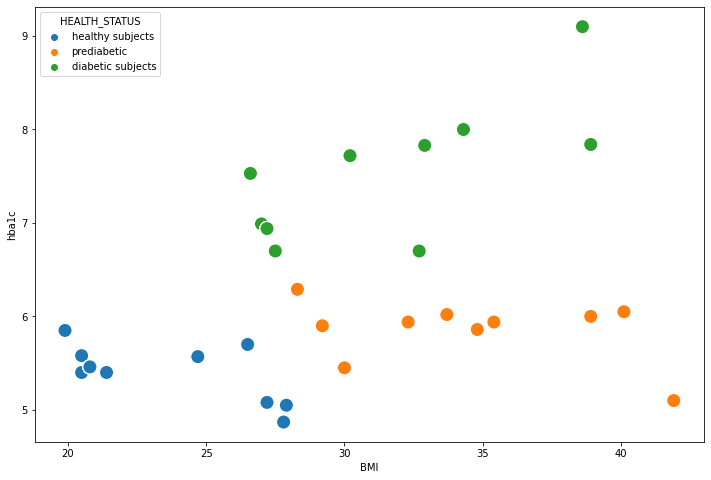

In [19]:
#Evaluar la relación del BMI y hba1c de cada grupo mediante un scatter       #Hipotésis 1
plt.figure(figsize=(12,8))
sns.scatterplot(x = sample_metadata["BMI"],
y = sample_metadata["hba1c"],
s= 200,   #tamaño de los circulos
hue = sample_metadata["HEALTH_STATUS"]);

In [20]:
#Evaluar la relación del BMI y hba1c de cada grupo mediante un gráfico de barras interactivo

trace1 = go.Bar(x = sample_metadata["HEALTH_STATUS"],
                y = sample_metadata['BMI'],
                name = 'BMI',
                marker = dict(color = 'rgba(0, 40, 70, 20)'),
                )

trace2 = go.Bar(x = sample_metadata["HEALTH_STATUS"],
               y = sample_metadata['hba1c'],
               name = 'hba1c',
               marker = dict(color = 'rgba(255, 148, 7, 80)'),
               )

data = [trace1, trace2] 

layout = go.Layout(barmode = "group") 

fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [21]:
#Evaluar la relación del BMI y hba1c (Gráfico final para la presentación)
x = sample_metadata.HEALTH_STATUS

trace1 = {
    'x': x,
    'y': sample_metadata['BMI'],
    'name': 'BMI',
    'type': 'bar'

}

trace2 = {
    'x': x,
    'y': sample_metadata['hba1c'],
    'name': 'hba1c',
    'type': 'bar'

}

data = [trace1, trace2]

layout  = {
    'xaxis': {'title': 'Estado de Salud'},
    'barmode': 'group',  #agrupa tambien hay la opcion de apilar
    'title': 'Relación entre BMI y hba1c'

}

fig = go.Figure(data = data, layout = layout)
iplot(fig)

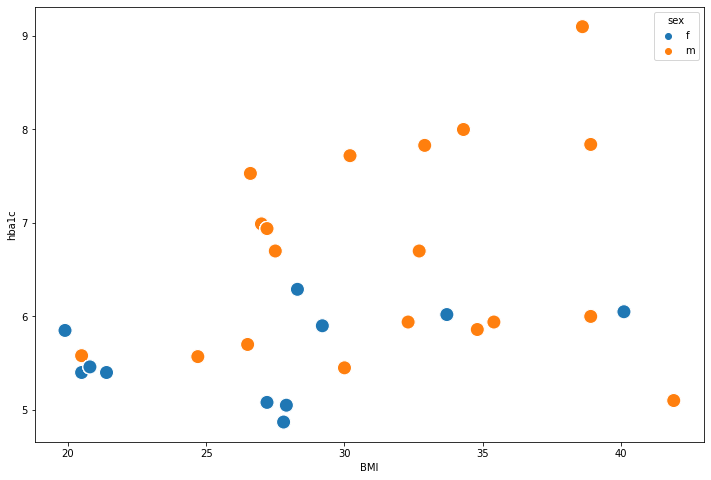

In [22]:
#Evaluar la relación del BMI y hba1c en relación al genero mediante un scatter  ---(Hipotésis 2)
plt.figure(figsize=(12,8))
sns.scatterplot(x = sample_metadata["BMI"],
y = sample_metadata["hba1c"],
s= 200,   #tamaño de los circulos
hue = sample_metadata["sex"]);

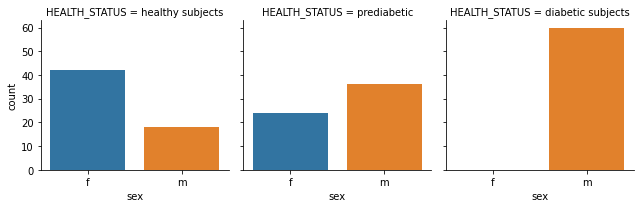

In [23]:
#Gráfico para evaluar el número de muestras implicadas en el estudio de acuerdo a su estado de salud y su genero, para relacionar el scatter anterior. (Para confirmar la Hipotesis 2)
sns.catplot(x='sex',
            col='HEALTH_STATUS',
            height=3,
            data=sample_metadata,
            kind='count');

### 3.2 Dataset Hoja2 -----> Principal de metabolitos encontrados

In [24]:
#Dataset principal de metabolitos encontrados 
#Como quiero hacer un PCA y la función que encontre dice que tengo que tener una columna común en la tabla para que la pueda cruzar con los datos de la Hoja 1, entonces agrego una una columna llamada Idx
data_matrix_pca

NameError: name 'data_matrix_pca' is not defined

In [ ]:
##necesito la matriz transpuesta
matrix= data_matrix_pca.transpose()

In [ ]:
#Crear una lista con el número correspondiente de mis filas 
rn1= range(1,181)
dataTable = matrix.assign(Idx = list(rn1))
#comprobamos que se añadió la columna
dataTable

compound_id,compound_0001,compound_0002,compound_0003,compound_0004,compound_0005,compound_0006,compound_0007,compound_0008,compound_0009,compound_0010,...,compound_1478,compound_1479,compound_1480,compound_1481,compound_1482,compound_1483,compound_1484,compound_1485,compound_1486,Idx
sample_0001,0.793620,0.743363,0.360069,0.557168,0.886952,0.698678,0.811203,0.546670,0.770260,0.781398,...,0.517077,0.661523,0.957021,1.384068,0.690831,0.865679,0.254363,1.369263,0.898327,1
sample_0002,0.713684,0.762673,0.716626,0.739390,0.921852,0.814239,0.858662,0.633751,0.740652,0.328962,...,0.534857,0.570957,1.111478,1.115342,0.917702,0.371899,0.244953,1.417962,1.023614,2
sample_0003,1.073165,1.184788,0.448938,0.609914,0.861769,1.064785,1.129699,1.094749,0.751253,0.942595,...,0.858642,0.463791,1.064177,1.036884,0.736977,0.919946,0.209242,1.028140,1.718457,3
sample_0004,1.074977,0.959059,0.695333,0.699223,0.893694,1.294579,1.062554,1.362446,0.739146,0.793178,...,0.770668,0.628167,1.075152,0.744478,0.750908,0.392298,0.211141,1.126669,2.942013,4
sample_0005,0.903153,0.442795,0.444998,0.668752,0.917792,0.832667,1.031598,0.645060,0.730204,0.888357,...,0.637424,0.862852,1.147057,1.206461,0.506770,0.651075,0.679437,0.936695,0.993321,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_0176,0.542919,0.553931,2.349338,0.936585,0.965326,0.787991,0.898010,0.843814,0.840719,0.714205,...,0.584738,2.699964,0.975919,0.858300,0.908436,0.788290,0.977343,1.131925,0.896456,176
sample_0177,0.628734,0.701192,1.245951,1.079366,1.014223,0.824301,0.900189,0.609887,0.897941,0.958437,...,0.678950,1.894706,1.021240,0.951380,0.842580,1.243000,0.815561,1.041996,0.743896,177
sample_0178,0.555390,0.576311,2.362415,1.029833,0.869503,0.737526,0.859506,0.659059,0.791604,0.686486,...,0.358595,1.628771,1.052294,0.610196,0.822898,0.200175,0.596484,1.050490,0.731513,178
sample_0179,0.590216,0.830575,1.660026,0.937246,1.008572,0.682781,0.885793,0.688223,0.945739,0.626076,...,0.716202,1.452911,1.225981,0.688868,1.028227,0.774527,3.107715,0.967872,0.618127,179


In [ ]:
#leo la hoja 1 para sacar una columna que necesito "Health", sample_id
sample_metadata.columns

Index(['sample_id', 'sample_id_study', 'CLIENT_IDENTIFIER', 'CLIENT_MATRIX',
       'DAY', 'Health', 'Time', 'HEALTH_STATUS', 'RUN_DAY', 'SAMPLE_AMT',
       'SUBJECT', 'Time Point', 'study_group', 'sex', 'BMI', 'hba1c'],
      dtype='object')

In [ ]:
#Sacar la clase sample_id
df= sample_metadata.loc[:,["sample_id"]]
df

,sample_id
0,sample_0001
1,sample_0002
2,sample_0003
3,sample_0004
4,sample_0005
...,...
175,sample_0176
176,sample_0177
177,sample_0178
178,sample_0179


In [ ]:
#pasar a lista porque me esta dando error el comando de concat result=pd.concat([df1,df2], axis=1)
muestras=df["sample_id"].tolist()

In [ ]:
#Sacar la clase Health

df1= sample_metadata.loc[:,["Health"]]
df1

,Health
0,Healthy
1,Healthy
2,Healthy
3,Healthy
4,Healthy
...,...
175,diabetic
176,diabetic
177,diabetic
178,diabetic


In [ ]:
#pasar a lista porque me esta dando error el comando de concat result=pd.concat([df1,df2], axis=1)
clase=sample_metadata["Health"].tolist()

In [ ]:
#Asignar clase a dataTable 

dataTable = dataTable.assign(Class = list(clase))
#comprobamos que se añadió la columna
dataTable

compound_id,compound_0001,compound_0002,compound_0003,compound_0004,compound_0005,compound_0006,compound_0007,compound_0008,compound_0009,compound_0010,...,compound_1479,compound_1480,compound_1481,compound_1482,compound_1483,compound_1484,compound_1485,compound_1486,Idx,Class
sample_0001,0.793620,0.743363,0.360069,0.557168,0.886952,0.698678,0.811203,0.546670,0.770260,0.781398,...,0.661523,0.957021,1.384068,0.690831,0.865679,0.254363,1.369263,0.898327,1,Healthy
sample_0002,0.713684,0.762673,0.716626,0.739390,0.921852,0.814239,0.858662,0.633751,0.740652,0.328962,...,0.570957,1.111478,1.115342,0.917702,0.371899,0.244953,1.417962,1.023614,2,Healthy
sample_0003,1.073165,1.184788,0.448938,0.609914,0.861769,1.064785,1.129699,1.094749,0.751253,0.942595,...,0.463791,1.064177,1.036884,0.736977,0.919946,0.209242,1.028140,1.718457,3,Healthy
sample_0004,1.074977,0.959059,0.695333,0.699223,0.893694,1.294579,1.062554,1.362446,0.739146,0.793178,...,0.628167,1.075152,0.744478,0.750908,0.392298,0.211141,1.126669,2.942013,4,Healthy
sample_0005,0.903153,0.442795,0.444998,0.668752,0.917792,0.832667,1.031598,0.645060,0.730204,0.888357,...,0.862852,1.147057,1.206461,0.506770,0.651075,0.679437,0.936695,0.993321,5,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_0176,0.542919,0.553931,2.349338,0.936585,0.965326,0.787991,0.898010,0.843814,0.840719,0.714205,...,2.699964,0.975919,0.858300,0.908436,0.788290,0.977343,1.131925,0.896456,176,diabetic
sample_0177,0.628734,0.701192,1.245951,1.079366,1.014223,0.824301,0.900189,0.609887,0.897941,0.958437,...,1.894706,1.021240,0.951380,0.842580,1.243000,0.815561,1.041996,0.743896,177,diabetic
sample_0178,0.555390,0.576311,2.362415,1.029833,0.869503,0.737526,0.859506,0.659059,0.791604,0.686486,...,1.628771,1.052294,0.610196,0.822898,0.200175,0.596484,1.050490,0.731513,178,diabetic
sample_0179,0.590216,0.830575,1.660026,0.937246,1.008572,0.682781,0.885793,0.688223,0.945739,0.626076,...,1.452911,1.225981,0.688868,1.028227,0.774527,3.107715,0.967872,0.618127,179,diabetic


In [ ]:
#Asignar SAMPLEID a dataTable 

dataTable = dataTable.assign(SampleID = list(muestras))
#comprobamos que se añadió la columna
hoja2=dataTable
hoja2

compound_id,compound_0001,compound_0002,compound_0003,compound_0004,compound_0005,compound_0006,compound_0007,compound_0008,compound_0009,compound_0010,...,compound_1480,compound_1481,compound_1482,compound_1483,compound_1484,compound_1485,compound_1486,Idx,Class,SampleID
sample_0001,0.793620,0.743363,0.360069,0.557168,0.886952,0.698678,0.811203,0.546670,0.770260,0.781398,...,0.957021,1.384068,0.690831,0.865679,0.254363,1.369263,0.898327,1,Healthy,sample_0001
sample_0002,0.713684,0.762673,0.716626,0.739390,0.921852,0.814239,0.858662,0.633751,0.740652,0.328962,...,1.111478,1.115342,0.917702,0.371899,0.244953,1.417962,1.023614,2,Healthy,sample_0002
sample_0003,1.073165,1.184788,0.448938,0.609914,0.861769,1.064785,1.129699,1.094749,0.751253,0.942595,...,1.064177,1.036884,0.736977,0.919946,0.209242,1.028140,1.718457,3,Healthy,sample_0003
sample_0004,1.074977,0.959059,0.695333,0.699223,0.893694,1.294579,1.062554,1.362446,0.739146,0.793178,...,1.075152,0.744478,0.750908,0.392298,0.211141,1.126669,2.942013,4,Healthy,sample_0004
sample_0005,0.903153,0.442795,0.444998,0.668752,0.917792,0.832667,1.031598,0.645060,0.730204,0.888357,...,1.147057,1.206461,0.506770,0.651075,0.679437,0.936695,0.993321,5,Healthy,sample_0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_0176,0.542919,0.553931,2.349338,0.936585,0.965326,0.787991,0.898010,0.843814,0.840719,0.714205,...,0.975919,0.858300,0.908436,0.788290,0.977343,1.131925,0.896456,176,diabetic,sample_0176
sample_0177,0.628734,0.701192,1.245951,1.079366,1.014223,0.824301,0.900189,0.609887,0.897941,0.958437,...,1.021240,0.951380,0.842580,1.243000,0.815561,1.041996,0.743896,177,diabetic,sample_0177
sample_0178,0.555390,0.576311,2.362415,1.029833,0.869503,0.737526,0.859506,0.659059,0.791604,0.686486,...,1.052294,0.610196,0.822898,0.200175,0.596484,1.050490,0.731513,178,diabetic,sample_0178
sample_0179,0.590216,0.830575,1.660026,0.937246,1.008572,0.682781,0.885793,0.688223,0.945739,0.626076,...,1.225981,0.688868,1.028227,0.774527,3.107715,0.967872,0.618127,179,diabetic,sample_0179


In [ ]:
#Dataset clase de compuestos estudio Hoja 3
data_dictionary.head()

,compound_id,PATHWAY_SORTORDER,BIOCHEMICAL,SUPER_PATHWAY,SUB_PATHWAY,COMP_ID,PLATFORM,RI,MASS,PUBCHEM,KEGG,HMDB_ID
0,compound_0001,1,glycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",58,LC/MS Pos Early,1375,76.0393,750,C00037,HMDB00123
1,compound_0002,2,N-acetylglycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",27710,LC/MS Neg,731,116.0353,10972,NaN,HMDB00532
2,compound_0003,4,sarcosine,Amino Acid,"Glycine, Serine and Threonine Metabolism",1516,LC/MS Pos Early,1280,90.055,1088,C00213,HMDB00271
3,compound_0004,5,dimethylglycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",5086,LC/MS Pos Early,1104,104.0706,673,C01026,HMDB00092
4,compound_0005,6,betaine,Amino Acid,"Glycine, Serine and Threonine Metabolism",3141,LC/MS Pos Early,1064,118.0863,247,C00719,HMDB00043


In [ ]:
#Creo un rango y asigno una nueva columna al df "sample_metadata", por que la necesito para hacer el pca
rn2= range(1,1487)
hoja3 = data_dictionary.assign(Idx = list(rn2)) 

In [ ]:
#Compruebo que se haya asignado la columna
hoja3

,compound_id,PATHWAY_SORTORDER,BIOCHEMICAL,SUPER_PATHWAY,SUB_PATHWAY,COMP_ID,PLATFORM,RI,MASS,PUBCHEM,KEGG,HMDB_ID,Idx
0,compound_0001,1,glycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",58,LC/MS Pos Early,1375,76.0393,750,C00037,HMDB00123,1
1,compound_0002,2,N-acetylglycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",27710,LC/MS Neg,731,116.0353,10972,NaN,HMDB00532,2
2,compound_0003,4,sarcosine,Amino Acid,"Glycine, Serine and Threonine Metabolism",1516,LC/MS Pos Early,1280,90.055,1088,C00213,HMDB00271,3
3,compound_0004,5,dimethylglycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",5086,LC/MS Pos Early,1104,104.0706,673,C01026,HMDB00092,4
4,compound_0005,6,betaine,Amino Acid,"Glycine, Serine and Threonine Metabolism",3141,LC/MS Pos Early,1064,118.0863,247,C00719,HMDB00043,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,compound_1482,.,X - 24699,.,.,53127,LC/MS Pos Early,2402.3,241.1544,NaN,NaN,NaN,1482
1482,compound_1483,.,X - 24728,.,.,53157,LC/MS Pos Early,1431,238.0376,NaN,NaN,NaN,1483
1483,compound_1484,.,X - 24738,.,.,53214,LC/MS Pos Early,1051,160.0967,NaN,NaN,NaN,1484
1484,compound_1485,.,X - 24748,.,.,53267,LC/MS Neg,4596,321.1469,NaN,NaN,NaN,1485


In [ ]:
#Renombrar columna compound_id
hoja3.rename(columns={'compound_id':'Name'}, inplace= True)
hoja3.rename(columns={'BIOCHEMICAL':'Label'}, inplace= True)
hoja3

,Name,PATHWAY_SORTORDER,Label,SUPER_PATHWAY,SUB_PATHWAY,COMP_ID,PLATFORM,RI,MASS,PUBCHEM,KEGG,HMDB_ID,Idx
0,compound_0001,1,glycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",58,LC/MS Pos Early,1375,76.0393,750,C00037,HMDB00123,1
1,compound_0002,2,N-acetylglycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",27710,LC/MS Neg,731,116.0353,10972,NaN,HMDB00532,2
2,compound_0003,4,sarcosine,Amino Acid,"Glycine, Serine and Threonine Metabolism",1516,LC/MS Pos Early,1280,90.055,1088,C00213,HMDB00271,3
3,compound_0004,5,dimethylglycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",5086,LC/MS Pos Early,1104,104.0706,673,C01026,HMDB00092,4
4,compound_0005,6,betaine,Amino Acid,"Glycine, Serine and Threonine Metabolism",3141,LC/MS Pos Early,1064,118.0863,247,C00719,HMDB00043,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,compound_1482,.,X - 24699,.,.,53127,LC/MS Pos Early,2402.3,241.1544,NaN,NaN,NaN,1482
1482,compound_1483,.,X - 24728,.,.,53157,LC/MS Pos Early,1431,238.0376,NaN,NaN,NaN,1483
1483,compound_1484,.,X - 24738,.,.,53214,LC/MS Pos Early,1051,160.0967,NaN,NaN,NaN,1484
1484,compound_1485,.,X - 24748,.,.,53267,LC/MS Neg,4596,321.1469,NaN,NaN,NaN,1485


In [ ]:
#CREAR PCA y un Loading Plot de los tres grupos 

peaklist = hoja3['Name']                   # Set peaklist to the metabolite names in the peakTableClean
X = hoja2[peaklist].values                      # Extract X matrix from dataTable using peaklist
Xlog = np.log10(X)                                  # Log scale (base-10)
Xscale = cb.utils.scale(Xlog, method='auto')        # methods include auto, pareto, vast, and level
Xknn = cb.utils.knnimpute(Xscale, k=3)              # missing value imputation (knn - 3 nearest neighbors)

print("Xknn: {} rows & {} columns".format(*Xknn.shape))

cb.plot.pca(Xknn,
            pcx=1,                                                  # pc for x-axis
            pcy=2,                                                  # pc for y-axis
            group_label=hoja2['Class'])                    # labels for Hover in PCA loadings plot

Xknn: 180 rows & 1486 columns


Loading BokehJS ...

In [ ]:
#Para una mejor visualización de las variables que pudieran ser responsable de la enfermedad cojo solo el grupo Diabetes y Sanos

filtered_df_hoja2=hoja2[hoja2['Class'].isin(['Healthy', 'diabetic'])]



In [ ]:


#To provide a multivariate assesment of the quality of the cleaned data set it is good practice to perform a simple Principal Component Analysis (PCA), after suitable transforming & scaling. 
#The PCA score plot is typically labelled by sample type (i.e. quality control (QC) or biological sample (Sample)). 

"""
First the metabolite data matrix is extracted from the dataTable, and transformed & scaled:

    A new variable peaklist is created, to hold the names (M1...Mn) of the metabolites to be used in subsequent statistical analysis
    The peak data for all samples, corresponding to this list, is extracted from the dataTable table, and placed in a matrix X
    The values in X are log-transformed (Xlog)
    The helper function cb.utils.scale() is used to scale the log-transformed data (Xscale)
    Missing values are imputed using a k-nearest neighbour approach (with three neighbours) to give the table Xknn

The transformed & scaled dataset Xknn is used as input to PCA, using the helper function cb.plot.pca(). This returns plots of PCA scores and PCA loadings, for interpretation and quality assessment.

"""

#Información proporcionada para el desarrollo del PCA

#To provide a multivariate assesment of the quality of the cleaned data set it is good practice to perform a simple Principal Component Analysis (PCA), after suitable transforming & scaling. 
#The PCA score plot is typically labelled by sample type (i.e. quality control (QC) or biological sample (Sample)). 

"""
First the metabolite data matrix is extracted from the dataTable, and transformed & scaled:

    A new variable peaklist is created, to hold the names (M1...Mn) of the metabolites to be used in subsequent statistical analysis
    The peak data for all samples, corresponding to this list, is extracted from the dataTable table, and placed in a matrix X
    The values in X are log-transformed (Xlog)
    The helper function cb.utils.scale() is used to scale the log-transformed data (Xscale)
    Missing values are imputed using a k-nearest neighbour approach (with three neighbours) to give the table Xknn

The transformed & scaled dataset Xknn is used as input to PCA, using the helper function cb.plot.pca(). This returns plots of PCA scores and PCA loadings, for interpretation and quality assessment.

"""

In [ ]:
#PCA  Sanos vs Diabéticos  (gráfico presentación)

peaklist = hoja3['Name']                   # Set peaklist to the metabolite names in the peakTableClean
X = filtered_df_hoja2[peaklist].values                      # Extract X matrix from dataTable using peaklist
Xlog = np.log10(X)                                  # Log scale (base-10)
Xscale = cb.utils.scale(Xlog, method='auto')        # methods include auto, pareto, vast, and level
Xknn = cb.utils.knnimpute(Xscale, k=3)              # missing value imputation (knn - 3 nearest neighbors)

print("Xknn: {} rows & {} columns".format(*Xknn.shape))

cb.plot.pca(Xknn,
            pcx=1,                                                  # pc for x-axis
            pcy=2,                                                  # pc for y-axis
            group_label=filtered_df_hoja2['Class'])                    # labels for Hover in PCA loadings plot


Xknn: 120 rows & 1486 columns


Loading BokehJS ...

Realizar análisis estadístico

In [ ]:

# Seleccionar los grupos a comparar para hacer el análisis estadístico
Stat_hoja2 = hoja2[(hoja2.Class == "diabetic") | (hoja2.Class == "Healthy")]  # Seleccionar solo los grupos Diabeticos y Sanos
pos_outcome = "diabetic"    #que resulten positivos para diabetes

# Calcular la estadistica básica y crear la tabla.
Tabla_estadistica = cb.utils.univariate_2class(Stat_hoja2,
                                        hoja3,
                                        group='Class',                # Columna para determinar los grupos
                                        posclass= pos_outcome,         # Valor posclass en la columna de acuerod a la clase
                                        parametric=True)              # Set parametric = True or False

# Imprimir tabla
Tabla_estadistica


C:\Users\Claudia\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

C:\Users\Claudia\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\morestats.py:2603: RuntimeWarning:

invalid value encountered in double_scalars



,Idx,Name,Label,Grp0_Mean,Grp0_Mean-95CI,Grp1_Mean,Grp1_Mean-95CI,Sign,TTestStat,TTestPvalue,bhQvalue,TotalMissing,PercTotalMissing,Grp0_Missing,Grp1_Missing,ShapiroW,ShapiroPvalue,LeveneW,LevenePvalue
1,1,compound_0001,glycine,1.192043,"(1.12, 1.26)",0.929497,"(0.87, 0.99)",0,5.542088,1.848349e-07,NaN,0,0.0,0.0,0.0,0.965770,3.784802e-03,0.035528,0.850816
2,2,compound_0002,N-acetylglycine,1.308192,"(1.19, 1.43)",0.952799,"(0.86, 1.05)",0,4.494654,1.637894e-05,NaN,0,0.0,0.0,0.0,0.925984,5.450908e-06,4.596315,0.034093
3,3,compound_0003,sarcosine,1.015306,"(0.89, 1.14)",1.153340,"(1.04, 1.27)",1,-1.602319,1.117587e-01,NaN,0,0.0,0.0,0.0,0.940640,4.729017e-05,0.006739,0.934714
4,4,compound_0004,dimethylglycine,0.907223,"(0.83, 0.98)",1.031709,"(0.98, 1.09)",1,-2.669773,8.660211e-03,NaN,0,0.0,0.0,0.0,0.968732,6.795282e-03,9.241222,0.002915
5,5,compound_0005,betaine,1.073005,"(1.0, 1.14)",1.013549,"(0.97, 1.06)",0,1.383652,1.690769e-01,NaN,0,0.0,0.0,0.0,0.961269,1.601881e-03,5.309837,0.022954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,1482,compound_1482,X - 24699,0.897484,"(0.82, 0.97)",1.157454,"(1.09, 1.23)",1,-5.071083,1.484947e-06,NaN,0,0.0,0.0,0.0,0.973029,1.631136e-02,0.022569,0.880839
1483,1483,compound_1483,X - 24728,0.706373,"(0.59, 0.82)",0.997034,"(0.88, 1.12)",1,-3.431010,8.295522e-04,NaN,0,0.0,0.0,0.0,0.945324,9.963310e-05,0.001557,0.968591
1484,1484,compound_1484,X - 24738,2.297380,"(1.6, 3.0)",1.642435,"(1.15, 2.13)",0,1.500534,1.361471e-01,NaN,0,0.0,0.0,0.0,0.755145,7.267517e-13,0.718475,0.398361
1485,1485,compound_1485,X - 24748,0.851830,"(0.78, 0.92)",1.173930,"(1.05, 1.3)",1,-4.471298,1.798423e-05,NaN,0,0.0,0.0,0.0,0.891919,7.742936e-08,5.945098,0.016249


In [ ]:
#ordenar T-test
Tabla_estadistica=Tabla_estadistica.sort_values(by="TTestPvalue", ascending=False)


In [ ]:
#Coger aquellos que p valor <=0.05
Ttest=Tabla_estadistica[Tabla_estadistica['TTestPvalue'] <= 0.05]


In [ ]:
Ttest.loc[:, ["Name", "Label", "Sign","TTestPvalue"]]

,Name,Label,Sign,TTestPvalue
1437,compound_1437,X - 23314,0,4.993480e-02
675,compound_0675,PC(16:0/18:3),0,4.923218e-02
503,compound_0503,CE(18:3),0,4.918289e-02
1475,compound_1475,X - 24513,1,4.829171e-02
359,compound_0359,orotate,0,4.608197e-02
...,...,...,...,...
274,compound_0274,arachidonoylcholine,0,3.992250e-24
102,compound_0102,3-methyl-2-oxobutyrate,1,6.115574e-25
174,compound_0174,"1,5-anhydroglucitol (1,5-AG)",0,2.957549e-28
175,compound_0175,glucose,1,1.799012e-29


In [ ]:
#cogemos aquellos que resulten significativamente más alto en diabetes 
Ttest=Tabla_estadistica[Tabla_estadistica['Sign'] == 1]
Ttest.loc[:, ["Name", "Label", "Sign","TTestPvalue"]]

,Name,Label,Sign,TTestPvalue
500,compound_0500,CE(18:0),1,9.996217e-01
1301,compound_1301,X - 12730,1,9.978571e-01
1356,compound_1356,X - 17010,1,9.929556e-01
1419,compound_1419,X - 21792,1,9.807163e-01
682,compound_0682,PC(16:0/22:6),1,9.778133e-01
...,...,...,...,...
17,compound_0017,glutamate,1,8.188690e-23
164,compound_0164,N-acetylcarnosine,1,2.585552e-23
102,compound_0102,3-methyl-2-oxobutyrate,1,6.115574e-25
175,compound_0175,glucose,1,1.799012e-29


In [ ]:
# Seleccionar los grupos a comparar para hacer el análisis estadístico
Stat_hoja2 = hoja2[(hoja2.Class == "diabetic") | (hoja2.Class == "Healthy")]  # Seleccionar solo los grupos Diabeticos y Sanos
pos_outcome = "Healthy"    #que resulten positivos para Sanos

# Calcular la estadistica básica y crear la tabla.
Tabla_estadistica_H = cb.utils.univariate_2class(Stat_hoja2,
                                        hoja3,
                                        group='Class',                # Columna para determinar los grupos
                                        posclass= pos_outcome,         # Valor posclass en la columna de acuerod a la clase
                                        parametric=True)              # Set parametric = True or False

# Imprimir tabla
Tabla_estadistica_H


C:\Users\Claudia\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.

C:\Users\Claudia\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\morestats.py:2603: RuntimeWarning:

invalid value encountered in double_scalars



,Idx,Name,Label,Grp0_Mean,Grp0_Mean-95CI,Grp1_Mean,Grp1_Mean-95CI,Sign,TTestStat,TTestPvalue,bhQvalue,TotalMissing,PercTotalMissing,Grp0_Missing,Grp1_Missing,ShapiroW,ShapiroPvalue,LeveneW,LevenePvalue
1,1,compound_0001,glycine,0.929497,"(0.87, 0.99)",1.192043,"(1.12, 1.26)",1,-5.542088,1.848349e-07,NaN,0,0.0,0.0,0.0,0.965770,3.784802e-03,0.035528,0.850816
2,2,compound_0002,N-acetylglycine,0.952799,"(0.86, 1.05)",1.308192,"(1.19, 1.43)",1,-4.494654,1.637894e-05,NaN,0,0.0,0.0,0.0,0.925984,5.450908e-06,4.596315,0.034093
3,3,compound_0003,sarcosine,1.153340,"(1.04, 1.27)",1.015306,"(0.89, 1.14)",0,1.602319,1.117587e-01,NaN,0,0.0,0.0,0.0,0.940640,4.729017e-05,0.006739,0.934714
4,4,compound_0004,dimethylglycine,1.031709,"(0.98, 1.09)",0.907223,"(0.83, 0.98)",0,2.669773,8.660211e-03,NaN,0,0.0,0.0,0.0,0.968732,6.795282e-03,9.241222,0.002915
5,5,compound_0005,betaine,1.013549,"(0.97, 1.06)",1.073005,"(1.0, 1.14)",1,-1.383652,1.690769e-01,NaN,0,0.0,0.0,0.0,0.961269,1.601881e-03,5.309837,0.022954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,1482,compound_1482,X - 24699,1.157454,"(1.09, 1.23)",0.897484,"(0.82, 0.97)",0,5.071083,1.484947e-06,NaN,0,0.0,0.0,0.0,0.973029,1.631136e-02,0.022569,0.880839
1483,1483,compound_1483,X - 24728,0.997034,"(0.88, 1.12)",0.706373,"(0.59, 0.82)",0,3.431010,8.295522e-04,NaN,0,0.0,0.0,0.0,0.945324,9.963310e-05,0.001557,0.968591
1484,1484,compound_1484,X - 24738,1.642435,"(1.15, 2.13)",2.297380,"(1.6, 3.0)",1,-1.500534,1.361471e-01,NaN,0,0.0,0.0,0.0,0.755145,7.267517e-13,0.718475,0.398361
1485,1485,compound_1485,X - 24748,1.173930,"(1.05, 1.3)",0.851830,"(0.78, 0.92)",0,4.471298,1.798423e-05,NaN,0,0.0,0.0,0.0,0.891919,7.742936e-08,5.945098,0.016249


In [ ]:
#ordenar T-test
Tabla_estadistica_H=Tabla_estadistica_H.sort_values(by="TTestPvalue", ascending=False)

In [ ]:
#Coger aquellos que p valor <=0.05
Ttest_H=Tabla_estadistica_H[Tabla_estadistica_H['TTestPvalue'] <= 0.05]


In [ ]:
#cogemos aquellos que resulten significativamente más alto en diabetes 
Ttest_H=Tabla_estadistica_H[Tabla_estadistica_H['Sign'] == 1]
Ttest_H= Ttest_H.loc[:, ["Name", "Label", "Sign","TTestPvalue"]]
Ttest_H

,Name,Label,Sign,TTestPvalue
646,compound_0646,PC(18:0/18:0),1,9.989640e-01
1421,compound_1421,X - 21803,1,9.932924e-01
269,compound_0269,phosphocholine,1,9.868573e-01
124,compound_0124,urea,1,9.751489e-01
715,compound_0715,PE(P-16:0/20:3),1,9.551107e-01
...,...,...,...,...
342,compound_0342,palmitoylcholine,1,7.904935e-22
344,compound_0344,oleoylcholine,1,5.110461e-22
276,compound_0276,docosahexaenoylcholine,1,4.989256e-23
274,compound_0274,arachidonoylcholine,1,3.992250e-24


In [ ]:
Ttest_glucose = Ttest_H[Ttest_H['Label'] == "glucose"]
Ttest_glucose

,Name,Label,Sign,TTestPvalue


### 3.3 Dataset Hoja 3   -----> Información identificacion/clase de los compuestos

In [ ]:
data_dictionary = pd.read_excel("../data/study_data.xlsx",sheet_name= "data_dictionary" )
data_dictionary.head()

,compound_id,PATHWAY_SORTORDER,BIOCHEMICAL,SUPER_PATHWAY,SUB_PATHWAY,COMP_ID,PLATFORM,RI,MASS,PUBCHEM,KEGG,HMDB_ID
0,compound_0001,1,glycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",58,LC/MS Pos Early,1375,76.0393,750,C00037,HMDB00123
1,compound_0002,2,N-acetylglycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",27710,LC/MS Neg,731,116.0353,10972,NaN,HMDB00532
2,compound_0003,4,sarcosine,Amino Acid,"Glycine, Serine and Threonine Metabolism",1516,LC/MS Pos Early,1280,90.055,1088,C00213,HMDB00271
3,compound_0004,5,dimethylglycine,Amino Acid,"Glycine, Serine and Threonine Metabolism",5086,LC/MS Pos Early,1104,104.0706,673,C01026,HMDB00092
4,compound_0005,6,betaine,Amino Acid,"Glycine, Serine and Threonine Metabolism",3141,LC/MS Pos Early,1064,118.0863,247,C00719,HMDB00043


In [ ]:
# GRAFICO DE BARRAS IDENTIFICACION DEL GRUPO DE BIOQUIMICO AL QUE PERTENECEN LOS COMPUESTOS IDENTIFICADOS
fig = px.bar(data_dictionary, x="SUPER_PATHWAY", color="SUPER_PATHWAY")
fig.update_traces(marker_line_width=0)
fig.show()

In [ ]:
#sacar la clase a la que pertenecen los compuestos
grupo_compuestos= data_dictionary["SUPER_PATHWAY"].value_counts()
grupo_compuestos

Triacylglycerol                 490
.                               260
Amino Acid                      149
Lipid                           142
Xenobiotics                      89
Diacylglycerol                   52
Phosphatidylcholine              41
Phosphatidylethanolamine         37
Nucleotide                       27
Cholesterol Ester                26
Free Fatty Acids                 26
Peptide                          24
Carbohydrate                     21
Cofactors and Vitamins           18
Lysophosphatidylcholine          15
Sphingomyelin                    12
Ceramides                         9
Energy                            8
Hexosylceramides                  7
Lysophosphatidylethanolamine      6
Sphingolipids                     5
PI                                5
Phospholipids                     5
Lactosylceramide                  4
Neutral Complex Lipids            4
Dihydroceramides                  4
Name: SUPER_PATHWAY, dtype: int64

In [ ]:
# GRAFICO IDENTIFICACION DEL GRUPO DE BIOQUIMICO AL QUE PERTENECEN LOS COMPUESTOS IDENTIFICADOS (Final para presentación)
fig = px.bar(grupo_compuestos, x="SUPER_PATHWAY", color="SUPER_PATHWAY")
fig.update_traces(marker_line_width=0)
fig.show()